# <img style="float: left; padding-right: 10px; width: 150px" src="../../imagini/unitbv2.png"> SIIPA2020- Știința Explorării și Exploatării Datelor - ADS1  






## <center>Curs 12 - Mașini cu Suport Vectorial: exemple cod</center>
**Universitatea Transilvania**<br>
**Semestrul I, 2020-2021**<br>
**Instructor:** Conf. univ. dr. Teodor &Scedil;tefan B&icirc;ldea<br>
**Contact:** teodor.bildea@unitbv.ro<br>


---

# Cuprins notebook:
1. Introducere Mașini cu Suport Vectorial
2. Exemple

Importuri necesare pentru curs

In [1]:
import pandas as pd
import sys
import numpy as np
import scipy as sp
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import Lasso
from sklearn.preprocessing import PolynomialFeatures
from sklearn.neighbors import KNeighborsRegressor
from sklearn.decomposition import PCA
from sklearn import tree
from sklearn import ensemble
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm
sns.set(style="ticks")
%matplotlib inline

%matplotlib inline

In [2]:
#--------  reprezentare grafcă a_frontierei de decizie

# O funcție care vizualizează datele și frontierele deciziei
# Input: 
#      x (predictori)
#      y (etichete clase)
#      model (classificator)
#      poly_flag (pentru model cvdratic dacă e pus pe true, altfel linear)
#      title (titlu pentru graifc)
#      ax (un reper de axe pentru reprezentarea grafică)
# Returns: 
#      ax (reper cu date și frontierele deciziei)

def plot_decision_boundary(x, y, model, title, ax, bounds=(0, 1), poly_flag=False):
    # Plot data
    ax.scatter(x[y == 1, 0], x[y == 1, 1], c='green')
    ax.scatter(x[y == 0, 0], x[y == 0, 1], c='gray', alpha=0.3)
    
    # Create mesh
    interval = np.arange(bounds[0], bounds[1], 0.01)
    n = np.size(interval)
    x1, x2 = np.meshgrid(interval, interval)
    x1 = x1.reshape(-1, 1)
    x2 = x2.reshape(-1, 1)
    xx = np.concatenate((x1, x2), axis=1)

    # Predict on mesh points
    if(poly_flag):
        quad_features = preprocessing.PolynomialFeatures(degree=2)
        xx = quad_features.fit_transform(xx)
        
    yy = model.predict(xx)    
    yy = yy.reshape((n, n))

    # Plot decision surface
    x1 = x1.reshape(n, n)
    x2 = x2.reshape(n, n)
    ax.contourf(x1, x2, yy, alpha=0.1, cmap='Greens')
    
    # Label axes, set title
    ax.set_title(title)
    ax.set_xlabel('Latitude')
    ax.set_ylabel('Longitude')
    
    return ax

Exemple:

1. Separabilitate liniară vs non-separabilitate
2. explorare rol vectori suport
3. explorare compromis între marginile claselor vs clasificare greșită 
4. comparație cu alte modele

### 1. Separabilitate liniară vs non-separabilitate

In [3]:
# Load dataset_1
data_1 = pd.read_csv('data/lec20_data1_train.csv', delimiter=',')

# Load dataset_2
data_2 = pd.read_csv('data/lec20_data2_train.csv', delimiter=',')

data_1.head()

,y,x1,x2
0,1,0.626331,0.675644
1,1,0.906825,0.784378
2,0,0.163387,0.156809
3,0,0.009464,0.320792
4,0,0.196253,0.259401


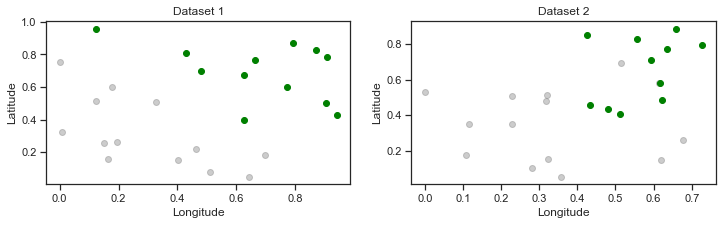

In [4]:
# Plot data
fig, ax = plt.subplots(1, 2, figsize = (12, 3))

#Plot dataset 1

x = data_1.values[:, [1,2]]
y = data_1.values[:, 0]

ax[0].scatter(x[y==0, 0], x[y==0, 1], c='gray', alpha=0.4)
ax[0].scatter(x[y==1, 0], x[y==1, 1], c='green')

ax[0].set_xlabel('Longitude')
ax[0].set_ylabel('Latitude')
ax[0].set_title('Dataset 1')

#Plot dataset 2

x = data_2.values[:, [1,2]]
y = data_2.values[:, 0]

ax[1].scatter(x[y==0, 0], x[y==0, 1], c='gray', alpha=0.4)
ax[1].scatter(x[y==1, 0], x[y==1, 1], c='green')

ax[1].set_xlabel('Longitude')
ax[1].set_ylabel('Latitude')
ax[1].set_title('Dataset 2')

plt.show()


Se pare că clasele din setul de date 1 pot fi separate liniar (printr-o linie), în timp ce clasele din setul de date 2 nu pot. În Dataset 1, este posibil să găsiți o submulțime de puncte din cele două clase care sunt bine separate, SVM alege submulțimea în care clasele sunt separate maxim (marja dintre punctele din diferite clase este maximizată). În Dataset 2 nu este posibil. Orice frontieră de decizie va avea unele erori (un amestec de clase de ambele părți).


### 2. Rolul vectorilor suport

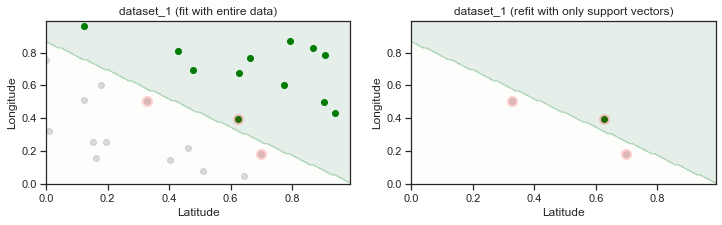

In [5]:
# Load dataset_1
x = data_1.values[:, [1,2]]
y = data_1.values[:, 0]

# Fit SVM model with C = 1000, linear kernel
model = svm.SVC(C=1000, kernel='linear')
model.fit(x, y)

# Plot decision boundary
fig, ax = plt.subplots(1, 2, figsize = (12, 3))
ax[0] = plot_decision_boundary(x, y, model, 'dataset_1 (fit with entire data)', ax[0])

# Highlight the support vectors
sv_indices = model.support_ # retrieve the support vector indices
ax[0].scatter(x[sv_indices, 0], x[sv_indices, 1], color='red', alpha=0.15, s=100) # draw circles around SVs

# Isolate only support vectors and their labels
x_svs = x[sv_indices, :] 
y_svs = y[sv_indices]
model.fit(x_svs, y_svs)

# Plot decision boundary with only support vectors
ax[1] = plot_decision_boundary(x_svs, y_svs, model, 'dataset_1 (refit with only support vectors)', ax[1])

# Highlight the support vectors
ax[1].scatter(x_svs[:, 0], x_svs[:, 1], color='red', alpha=0.15, s=100) # draw circles around SVs

plt.show()

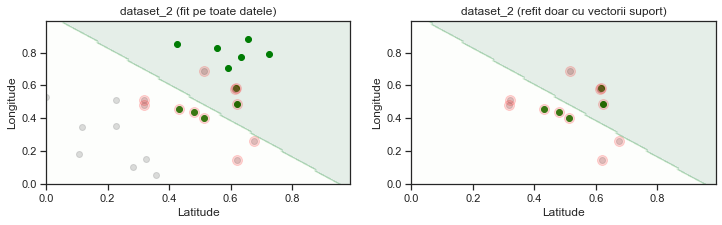

In [6]:
# Load dataset_2
x = data_2.values[:, [1,2]]
y = data_2.values[:, 0]


# Fit SVM model with C = 1000, linear kernel
model = svm.SVC(C=10000, kernel='linear')
model.fit(x, y)

# Plot decision boundary
fig, ax = plt.subplots(1, 2, figsize = (12, 3))
ax[0] = plot_decision_boundary(x, y, model, 'dataset_2 (fit pe toate datele)', ax[0])

# Highlight the support vectors
sv_indices = model.support_ # retrieve the support vector indices
ax[0].scatter(x[sv_indices, 0], x[sv_indices, 1], color='red', alpha=0.15, s=100) # draw circles around SVs

# Isolate only support vectors and their labels
x_svs = x[sv_indices, :] 
y_svs = y[sv_indices]
model.fit(x_svs, y_svs)

# Plot decision boundary with only support vectors
ax[1] = plot_decision_boundary(x_svs, y_svs, model, 'dataset_2 (refit doar cu vectorii suport)', ax[1])

# Highlight the support vectors
ax[1].scatter(x_svs[:, 0], x_svs[:, 1], color='red', alpha=0.15, s=100) # draw circles around SVs

plt.show()

În ambele cazuri, frontiera de decizie a unui SVM este complet determinată de un subset de puncte de date - vectorii suport.

### 3. Compromis între marginile claselor și clasificare greșită 

In [7]:
#--------  fit_and_plot_svm_for_c
# Fit and plot SVM model for value of 'C', overlayed on a scatter plot of data 
# (fit on train set and evaluate on test set)
#
# Input: 
#      x_train (array de predictori - train)
#      y_train (array de observații în setul de train )#      
#      x_test (array de predictori - test)
#      y_test (array de observații în setul de test)
#      bounds (tuplu cu limite de frontieră pentru grafic)

#      C  (parametrul de regularizare C. Tăria regularizării este invers proporțională cu C. 
#          Trebuie să fie strict pozitivă. Penalizarea este pătrată - l2.)

#      ax (axe pentru reprezentarea grafică)

def fit_and_plot_svm_for_c(x_train, y_train, x_test, y_test, C, ax, bounds=(0, 1)):
    # Fit SVM model
    model = svm.SVC(C=C, kernel='linear')
    model.fit(x_train, y_train)
    
    # Train and test error
    tr_acc = model.score(x_train, y_train)
    ts_acc = model.score(x_test, y_test)

    # Plot decision boundary
    plot_decision_boundary(x_train, y_train, model, \
                           'C = ' + str(C)\
                           + ', train acc = ' + str(tr_acc)\
                           + ', test acc = ' + str(ts_acc), ax, bounds)
    
    # Plot support vectors
    sv_indices = model.support_ # retrieve the support vector indices
    ax.scatter(x_train[sv_indices, 0], x_train[sv_indices, 1], color='red', alpha=0.15, s=100) # draw circles around SVs
    
    return ax

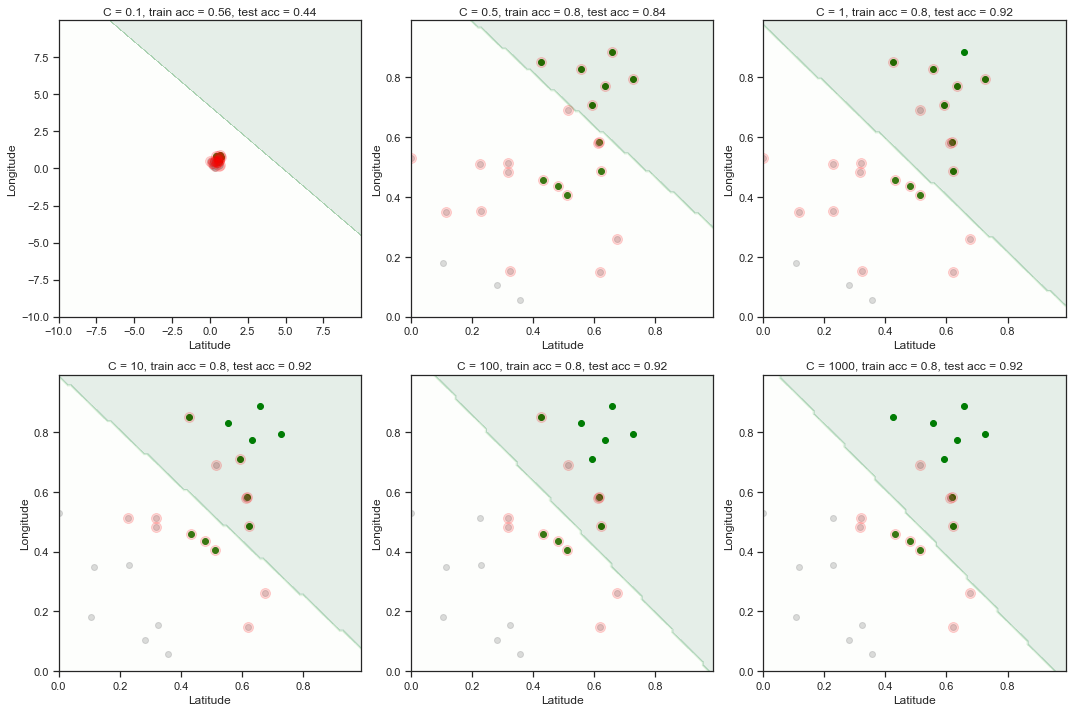

In [8]:
# Load train data
data_train = data_2.values
x_train = data_train[:, [1,2]]
y_train = data_train[:, 0]

# Load test data
data_test = pd.read_csv("data/lec20_data2_test.csv", delimiter=',').values
x_test = data_test[:, [1,2]]
y_test = data_test[:, 0]

# Fit and plot for different 'C' values
fig, ax = plt.subplots(2, 3, figsize = (15, 10))

ax[0, 0] = fit_and_plot_svm_for_c(x_train, y_train, x_test, y_test, 0.1, ax[0, 0], (-10, 10))

ax[0, 1] = fit_and_plot_svm_for_c(x_train, y_train, x_test, y_test, 0.5, ax[0, 1])

ax[0, 2] = fit_and_plot_svm_for_c(x_train, y_train, x_test, y_test, 1, ax[0, 2])

ax[1, 0] = fit_and_plot_svm_for_c(x_train, y_train, x_test, y_test, 10, ax[1, 0])

ax[1, 1] = fit_and_plot_svm_for_c(x_train, y_train, x_test, y_test, 100, ax[1, 1])

ax[1, 2] = fit_and_plot_svm_for_c(x_train, y_train, x_test, y_test, 1000, ax[1, 2])

plt.tight_layout()

Pentru `dataset_2`, orice hotar liniar de decizie ar avea unele erori. În acest caz, SVM alege o graniță de decizie prin tranzacționarea erorilor pentru marjă (adică echilibrarea minimizării erorii cu maximizarea marjei). Parametrul $ C $ controlează compromisul.

Creșterea $ C $ pune un accent mai mare pe acuratețe (după cum se vede după $ C = 10 $, precizia atrenamentului nu poate fi îmbunătățită printr-un clasificator liniar și, astfel, limita deciziei încetează să se schimbe) și mai puțin accent pe marja de separare. Drept urmare, modelul tinde să se potriveasca setului de antrenament și să aibă performanțe slabe pe setul de testare.

### 4. Comparația cu alte modele

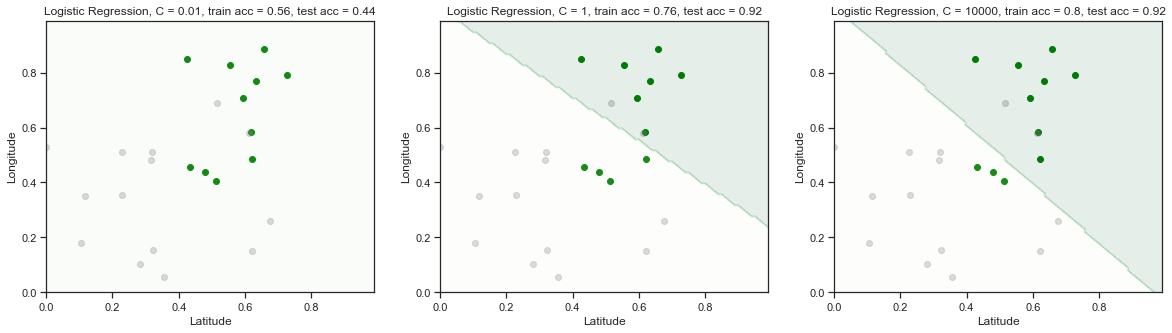

In [9]:
def fit_logistic_plot(x_train, x_test, y_train, y_test, C, ax):
    logreg = LogisticRegression(C=C)
    logreg.fit(x_train, y_train)
    test_score = logreg.score(x_test, y_test)
    train_score = logreg.score(x_train, y_train)
    ax = plot_decision_boundary(x_train, y_train, logreg, 'Logistic Regression, C = ' + str(C) + ', train acc = ' + str(train_score) + ', test acc = ' + str(test_score), ax, bounds=(0, 1), poly_flag=False)
    return ax

fig, ax = plt.subplots(1, 3, figsize = (20, 5))

ax[0] = fit_logistic_plot(x_train, x_test, y_train, y_test, 0.01, ax[0])
ax[1] = fit_logistic_plot(x_train, x_test, y_train, y_test, 1, ax[1])
ax[2] = fit_logistic_plot(x_train, x_test, y_train, y_test, 10000, ax[2])

    
plt.show()

Reglarea compromisului precizie-marjă în SVM și a parametrului de regularizare $ \ ell_2 $ în regresia logistică produc limite de decizie similare pentru Dataset 2. În acest sens, luarea în considerare a marjei la antrenarea modelului este o altă formă de regularizare.

Alte dimensiuni de-a lungul cărora putem compara SVM cu regresia logistică:
1. timpul necesar pentru antrenament
2. timpul pentru a clasifica un singur punct de date de testare
3. complexitatea spațiului de stocare: atunci când stocăm fiecare „model” ce trebuie să stocăm?
4. ușurința actualizării modelului: atunci când setul de date de antrenament se modifică ușor, cât de ușor este recalificarea fiecărui model?


In [10]:
def fit_and_plot_svm_for_poly_c(x_train, y_train, x_test, y_test, C, ax, bounds=(0, 1), degree = 2):
    # Fit SVM model
    model = svm.SVC(C=C, kernel='poly', degree=degree)
    model.fit(x_train, y_train)
    
    # Train and test error
    tr_acc = model.score(x_train, y_train)
    ts_acc = model.score(x_test, y_test)

    # Plot decision boundary
    plot_decision_boundary(x_train, y_train, model, \
                           'C = ' + str(C)\
                           + ', train acc = ' + str(tr_acc)\
                           + ', test acc = ' + str(ts_acc), ax, bounds)
    
    # Plot support vectors
    sv_indices = model.support_ # retrieve the support vector indices
    ax.scatter(x_train[sv_indices, 0], x_train[sv_indices, 1], color='red', alpha=0.15, s=100) # draw circles around SVs
    
    return ax

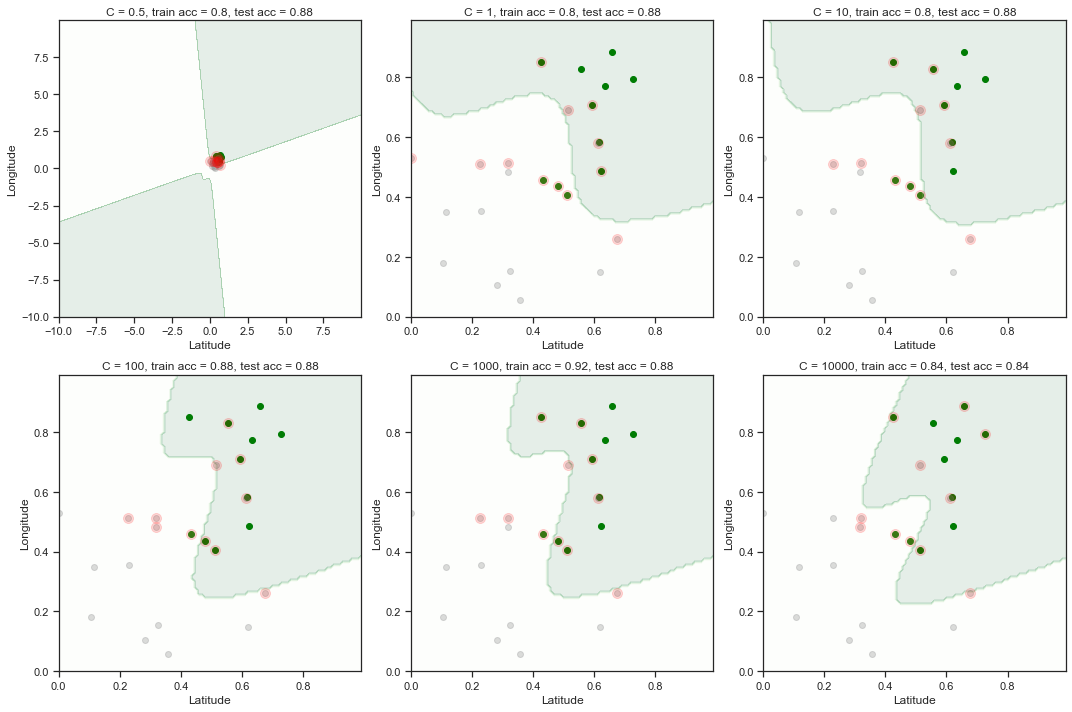

In [11]:
# Fit and plot for different 'C' values when polynomial degree is 2
fig, ax = plt.subplots(2, 3, figsize = (15, 10))

deg = 4

ax[0, 0] = fit_and_plot_svm_for_poly_c(x_train, y_train, x_test, y_test, 0.5, ax[0, 0], (-10, 10), degree = deg)

ax[0, 1] = fit_and_plot_svm_for_poly_c(x_train, y_train, x_test, y_test, 1, ax[0, 1], degree = deg)

ax[0, 2] = fit_and_plot_svm_for_poly_c(x_train, y_train, x_test, y_test, 10, ax[0, 2], degree = deg)

ax[1, 0] = fit_and_plot_svm_for_poly_c(x_train, y_train, x_test, y_test, 100, ax[1, 0], degree = deg)

ax[1, 1] = fit_and_plot_svm_for_poly_c(x_train, y_train, x_test, y_test, 1000, ax[1, 1], degree = deg)

ax[1, 2] = fit_and_plot_svm_for_poly_c(x_train, y_train, x_test, y_test, 10000, ax[1, 2], degree = deg)

plt.tight_layout()

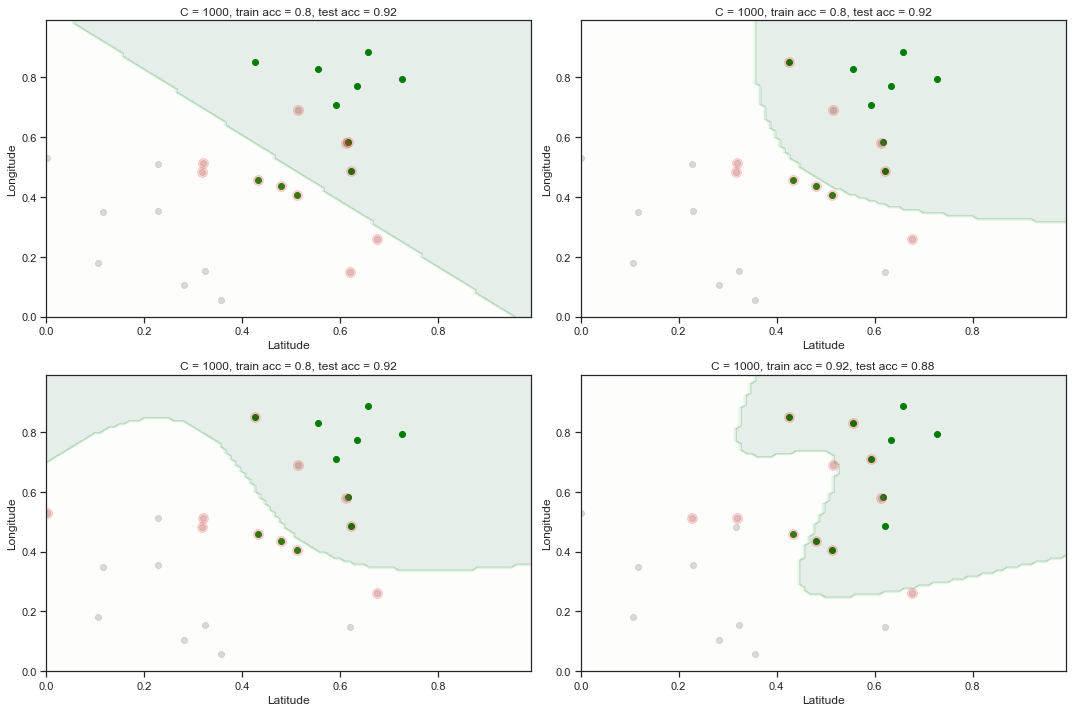

In [12]:
# Fit and plot for different degrees for polynomial boundary...this takes a while
fig, ax = plt.subplots(2, 2, figsize = (15, 10))

ax[0, 0] = fit_and_plot_svm_for_poly_c(x_train, y_train, x_test, y_test, 1000, ax[0, 0], degree = 1)

ax[0, 1] = fit_and_plot_svm_for_poly_c(x_train, y_train, x_test, y_test, 1000, ax[0, 1], degree = 2)

ax[1, 0] = fit_and_plot_svm_for_poly_c(x_train, y_train, x_test, y_test, 1000, ax[1, 0], degree = 3)

ax[1, 1] = fit_and_plot_svm_for_poly_c(x_train, y_train, x_test, y_test, 1000, ax[1, 1], degree = 4)


plt.tight_layout()

In [13]:
# What about other kernels?
def fit_and_plot_svm_for_kernels(x_train, y_train, x_test, y_test, C, ax, bounds=(0, 1), kernel = 'rbf'):
    # Fit SVM model
    model = svm.SVC(C=C, kernel=kernel)
    model.fit(x_train, y_train)
    
    # Train and test error
    tr_acc = model.score(x_train, y_train)
    ts_acc = model.score(x_test, y_test)

    # Plot decision boundary
    plot_decision_boundary(x_train, y_train, model, \
                           'C = ' + str(C)\
                           + ', train acc = ' + str(tr_acc)\
                           + ', test acc = ' + str(ts_acc), ax, bounds)
    
    # Plot support vectors
    sv_indices = model.support_ # retrieve the support vector indices
    ax.scatter(x_train[sv_indices, 0], x_train[sv_indices, 1], color='red', alpha=0.15, s=100) # draw circles around SVs
    
    return ax

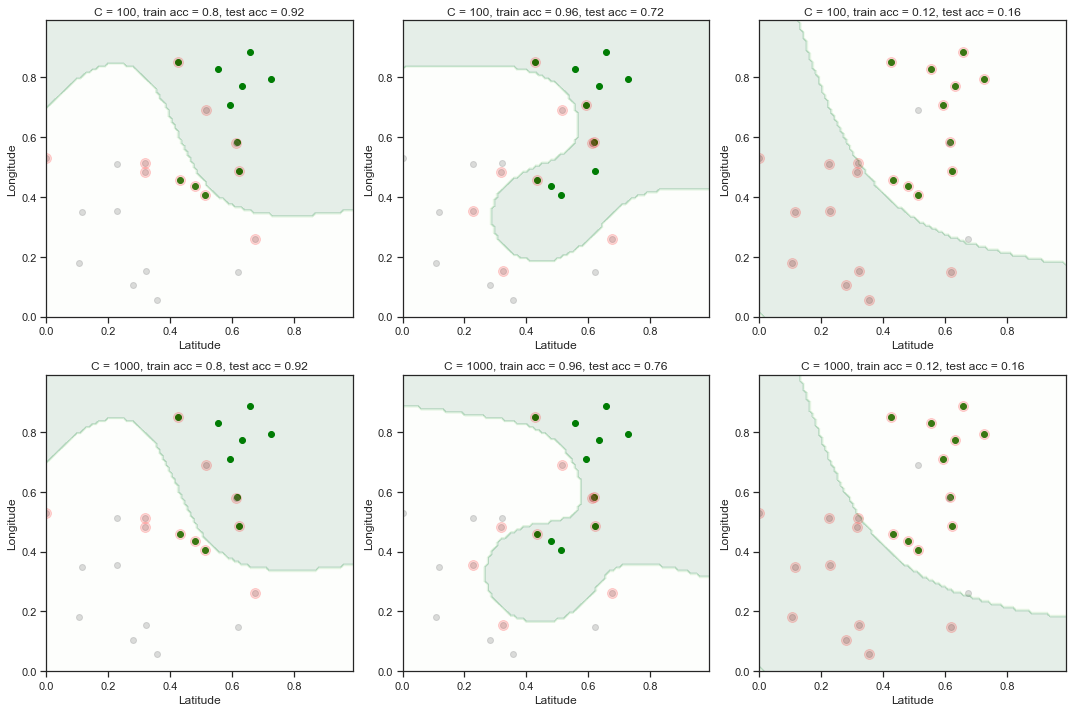

In [14]:
fig, ax = plt.subplots(2, 3, figsize = (15, 10))

ax[0, 0] = fit_and_plot_svm_for_kernels(x_train, y_train, x_test, y_test, 100, ax[0, 0], kernel = "poly")

ax[0, 1] = fit_and_plot_svm_for_kernels(x_train, y_train, x_test, y_test, 100, ax[0, 1], kernel = "rbf")

ax[0, 2] = fit_and_plot_svm_for_kernels(x_train, y_train, x_test, y_test, 100, ax[0, 2], kernel = "sigmoid")

ax[1, 0] = fit_and_plot_svm_for_kernels(x_train, y_train, x_test, y_test, 1000, ax[1, 0], kernel = "poly")

ax[1, 1] = fit_and_plot_svm_for_kernels(x_train, y_train, x_test, y_test, 1000, ax[1, 1], kernel = "rbf")

ax[1, 2] = fit_and_plot_svm_for_kernels(x_train, y_train, x_test, y_test, 1000, ax[1, 2], kernel = "sigmoid")


plt.tight_layout()

In [ ]:
# desigur, ar trebui utilizată o validare încrucișată pentru a determina cât de multă penalizare
# (ceea ce sklearn numește „1 / C”) trebuie utilizată pentru fiecare metodă

### Hiperparametrii SVM
 - nucleul: `kernels` valori în [‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’]
 - parametrul de regularizare `C` :  valori de încercat [100, 10, 1.0, 0.1, 0.001]
 
NOTA BENE: Aici aveți două exemple simple de cod funcțional. Trebuie căuate valori optime pentru hiperparametrii folosind GridSearchCV pe X_train (vezi exemplul de regresie); de abia apoi cu hiperparametrii stabiliți se antrenează pe tot setul de date X_train rezultat din splitul X_train, X_test.

### Exemplu clasificare cu SVM


In [15]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm

In [16]:
df_heart = pd.read_csv('../Curs9/data/Heart.csv',header = 0).iloc[:,1:]

X = df_heart[['MaxHR','Sex']]
y = df_heart['AHD']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
C_vals = [0.1]
C = C_vals[0]

svmclsf = svm.SVC(C=C, kernel='linear')

svmclsf.fit(X_train, y_train)
y_train_pred = svmclsf.predict(X_train)
y_test_pred = svmclsf.predict(X_test)

In [19]:
print('fitting_score', metrics.accuracy_score(y_true = y_train, y_pred=y_train_pred))
print('prediction_score', metrics.accuracy_score(y_true = y_test, y_pred=y_test_pred))

fitting_score 0.71900826446281
prediction_score 0.6721311475409836


In [21]:
print(metrics.classification_report (y_true = y_test, y_pred=y_test_pred))

              precision    recall  f1-score   support

          No       0.68      0.80      0.74        35
         Yes       0.65      0.50      0.57        26

    accuracy                           0.67        61
   macro avg       0.67      0.65      0.65        61
weighted avg       0.67      0.67      0.66        61



### Exemplu regresie cu SVM

In [22]:
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn import svm

In [45]:
dataset = pd.read_csv('../Curs10/petrol_consumption.csv')
X = dataset.iloc[:, 0:4].values
y = dataset.iloc[:, 4].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [49]:
dataset.shape

(48, 5)

In [46]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [50]:
from sklearn.model_selection import GridSearchCV
C_vals = [0.1]
C = C_vals[0]
param_grid ={'kernel':['linear','poly','rbf'],
             'C':[ 0.5 ,0.1, 1, 10, 100, 1000]}

svr = svm.SVR()
CV_svr = GridSearchCV(estimator=svr, param_grid=param_grid, cv= 2, n_jobs = 4)
CV_svr.fit(X_train, y_train)

y_pred =CV_svr.best_estimator_.predict(X_test)
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))
print(CV_svr.best_params_)



Root Mean Squared Error: 46.25448284999071
{'C': 100, 'kernel': 'linear'}


In [51]:
svr = svm.SVR(C= 0.1, kernel = 'linear')
svr.fit(X_train, y_train)
y_pred = svr.predict(X_test)
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

Mean Absolute Error: 50.206959086411146
Mean Squared Error: 4008.7763090729977
Root Mean Squared Error: 63.31489800254754
